**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
from scipy.stats import zscore
from matplotlib import pyplot as plt


# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
weka2 = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
weka2.shape

(310, 7)

In [4]:
weka2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [5]:
weka2.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [6]:
weka2.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


# Encode the Class variable to integer.

In [7]:
le = LabelEncoder()
weka2['class'] = le.fit_transform(weka2['class'])

In [8]:
weka2.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
68,72.076278,18.946176,51.000000,53.130102,114.213013,1.010041,0
66,78.491730,22.181798,60.000000,56.309932,118.530327,27.383213,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
274,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018,1
228,38.046551,8.301669,26.236830,29.744881,123.803413,3.885773,1
62,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,0
104,77.409333,29.396545,63.232302,48.012788,118.450731,93.563737,0
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,0
24,36.125683,22.758753,29.000000,13.366931,115.577116,-3.237562,0
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0


In [9]:
weka2.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
0,210,210,210,210,210,210
1,100,100,100,100,100,100


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [10]:
Y = weka2['class']

In [11]:
X = weka2.drop('class', axis=1)

# Normalize your Data (X) to get values between 0 to 1.

In [12]:
normalized_X = preprocessing.normalize(X)

In [13]:
normalized_X

array([[ 0.47747441,  0.17084969,  0.30006338,  0.30662473,  0.74750793,
        -0.00192724],
       [ 0.30683541,  0.07904018,  0.19652338,  0.22779523,  0.89878075,
         0.03585728],
       [ 0.47319951,  0.1527454 ,  0.34436881,  0.32045411,  0.72861603,
        -0.02426987],
       ...,
       [ 0.39893156,  0.14734321,  0.29975311,  0.25158834,  0.81589576,
        -0.01758045],
       [ 0.32622463,  0.06266844,  0.29977024,  0.26355619,  0.85458978,
         0.00154812],
       [ 0.24745062,  0.03710111,  0.26792128,  0.21034951,  0.9062896 ,
        -0.00145691]])

# Split the data as train and test with a ratio of 70:30.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=4)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [36]:
sc = StandardScaler()
knn=KNeighborsClassifier(n_neighbors=14)

In [37]:
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [38]:
print("What is the Training Accuracy")
print(knn.score(scaledX_train,y_train))

What is the Training Accuracy
0.8617511520737328


In [39]:
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,y_test))

What is the Testing Accuracy
0.8817204301075269


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

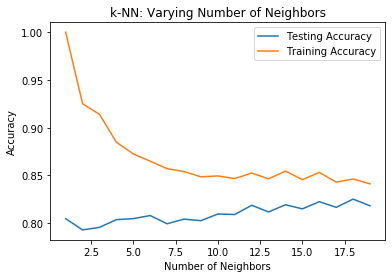

In [40]:
neighbors = np.arange(1, 20)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [41]:
print("Best k-value for this classification is 12 & 14")

Best k-value for this classification is 12 & 14


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [19]:
weka3 = pd.read_csv("3Classdata.csv")

In [20]:
weka3.shape

(310, 7)

In [21]:
weka3.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [22]:
weka3.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [23]:
weka3['class'] = le.fit_transform(weka3['class'])

In [24]:
weka3.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
0,60,60,60,60,60,60
1,100,100,100,100,100,100
2,150,150,150,150,150,150


In [25]:
Y1 = weka3['class']
X1 = weka3.drop('class', axis=1)

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.30,random_state=4)

In [45]:
knn1=KNeighborsClassifier(n_neighbors=17)
sc.fit(X1_train)
scaledX1_train = sc.transform(X1_train)
scaledX1_test = sc.transform(X1_test)
knn1.fit(scaledX1_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [46]:
print("What is the Training Accuracy")
print(knn1.score(scaledX1_train,y1_train))

What is the Training Accuracy
0.7926267281105991


In [47]:
print("What is the Testing Accuracy")
print(knn1.score(scaledX1_test,y1_test))

What is the Testing Accuracy
0.8279569892473119


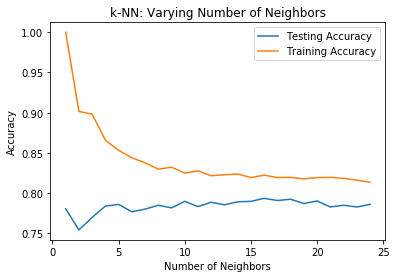

In [34]:
neighbors = np.arange(1, 25)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [48]:
print("Best k-value for this classification is 17")

Best k-value for this classification is 17
